# 线性回归练习

在最前面我想说一句，这个Program写到后半部分的时候我发现使用的相同的变量太多了，建议在每个大的模块结束后在前面进行变量的copy以防止往前调用的时候没有办法使得我们必须要从头开始走。

首先下载数据
- 虽然直接从网络上下载会显得直观、方便，但是面对更新频繁的数据集时还是会显得麻烦。
- 因此我们可以通过编写程序的方式进行简化操作。
- 最好是将其写进一个函数中，这样可以反复调用

In [1]:
# 首先导入下载需要的功能包
import os
import tarfile
import urllib

In [2]:
def fetch_datasets(data_url, data_path, tgz_name):
    os.makedirs(data_path, exist_ok = True)
    tgz_path = os.path.join(data_path, tgz_name)
    urllib.request.urlretrieve(data_url, tgz_path)
    data_tgz = tarfile.open(tgz_path)
    data_tgz.extractall(path = data_path)
    data_tgz.close()

后续我们只需要把相关的网页以及保存的路径输入进去即可

In [5]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
fetch_datasets(data_url = HOUSING_URL, data_path = HOUSING_PATH, tgz_name = "housing.tgz")

URLError: <urlopen error [Errno 101] Network is unreachable>

现在我们可以利用pandas的功能包来进行数据的导入以及展示。

In [3]:
import pandas as pd
housing_data = pd.read_csv("datasets/housing/housing.csv")
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


我们使用.head来展示数据集的前五行数据，当然我们也可以在括号内添加数字来自定义展示。
- 例如：我们可以选择展示前十行的内容

In [4]:
housing_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


在这里书中大致介绍了pandas的查看数据的几种模式，这里就不再赘述。

后续使用matplotlib进行画图使得数据更加直观的展现出来。\
需要注意的是hist()需要依赖于matplotlib，而matplotlib需要指定后端才可以进行绘制，因此我们使用下面代码中的第一句来指定只显示在notebook中

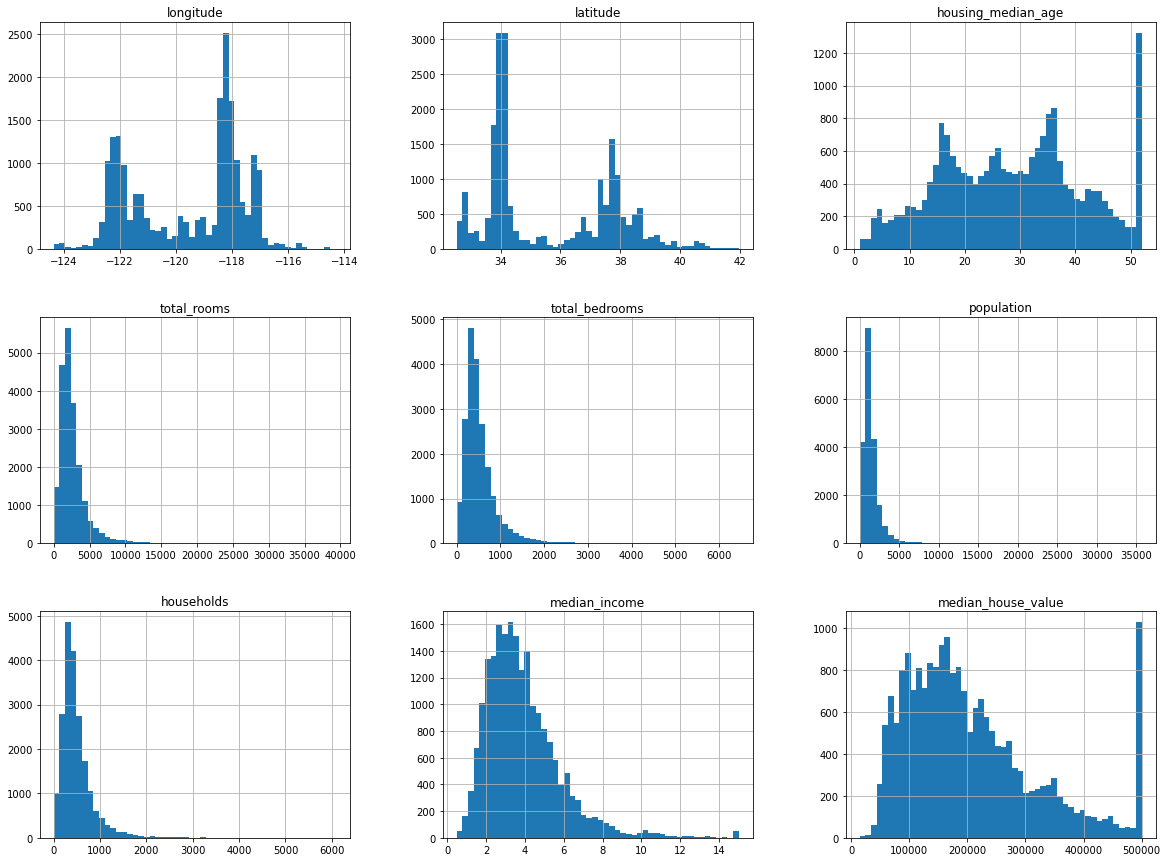

In [5]:
%matplotlib inline
# 上述的指令使得matplotlib只显示在 jupyter notebook 中
import matplotlib.pyplot as plt
housing_data.hist(bins = 50, figsize = (20, 15))
plt.show()

上述的内容都是锦上添花的功效，能够帮助我们更直观的了解这些数据。\
我们真正需要着重了解的在后续的内容。

在这里我们要将数据区分为训练集与测试集：\
在壁虎书的中文版中标题为创建测试集，我觉得这个标题略有些不严谨。\
作者这里采用的是随机排列取样的方法。

In [6]:
import numpy as np
def split_train_test(data, test_ratio):
    # 返回一个长度为len(data)的随机排列
    shuffled_indices = np.random.permutation(len(data))
    # int型强制转化，结果要取整
    test_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

后面我们带入数据并进行大致的检验。

In [7]:
train_data, test_data = split_train_test(housing_data, 0.3)
len(train_data), len(test_data)

(14448, 6192)

由于每次运行上面函数的时候，所生成的随机数都会进行重置，导致每次分割出的训练集和测试集都会不一样，这样不断进行下去，所有的测试集都会出现在训练集当中。\
因此，我们需要避免这样的情况发生。\
常见的解决方案是给每一个实例（数据）进行标记，来决定是否进入测试集。\
这边给出了几个实现方式示例，但是所调用的库以及实现方式奈何本人水平有限，没怎么看懂。\
但是无伤大雅，因为sklearn给出了一个便于操作使用的函数：

In [8]:
from sklearn.model_selection import train_test_split
# 这里的random_state为随机数种子，比较常用的数值为42，貌似涉及计算机其他领域的知识，这里不过度钻研
train_set, test_set = train_test_split(housing_data, test_size = 0.3, random_state = 42)

现在需要收集中位数收入作为代表性的数据\
bins将数据分成了五块，并给予了标签labels

In [9]:
housing_data["income_cat"] = pd.cut(housing_data["median_income"], bins = [0., 1.5, 3.0, 4.5, 6., np.inf], labels = [1, 2, 3, 4, 5])

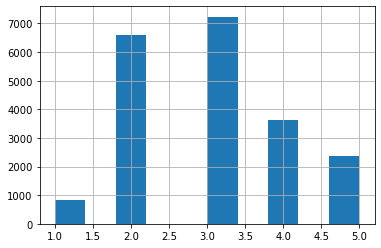

In [10]:
housing_data["income_cat"].hist()
plt.show()

随后我们使用sklearn提供的分层抽样函数进行训练集和测试集的划分

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

In [12]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [13]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

这里作者又将housing_data复原，这里便不过多操作了\
训练集和测试集的划分十分重要，在我之前tf的训练过程中，总会造成由于训练集的划分不得当而导致训练结果过拟合的情况出现。\
因此我十分赞同作者的话，并且今后在划分方面应该着重学习。

在这里我们将数据可视化，按照经纬度的分布在图中进行绘制\
并且，由于数据点较多，我们在这里加入alpha值，以便更能直观的看到高密度的区域

<AxesSubplot:xlabel='经度', ylabel='纬度'>

/home/adan/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 32463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/adan/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/adan/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 32463 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/adan/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/adan/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 32428 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/adan/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWar

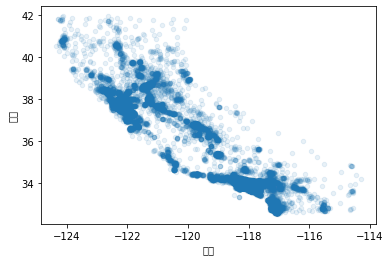

In [14]:
# kind为显示类型，“scatter”为数据帧类型，有点类似于散点图
housing_data.plot(kind = "scatter", x = "longitude", xlabel = "经度", y = "latitude", ylabel = "纬度", alpha = 0.1)

然后我们现在多引入一些参数：
- 圆圈的半径大小代表该区域的人口数量
- 不同颜色代表了房产价值

/home/adan/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/adan/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 21475 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/adan/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/adan/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/adan/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 21475 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/adan/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWar

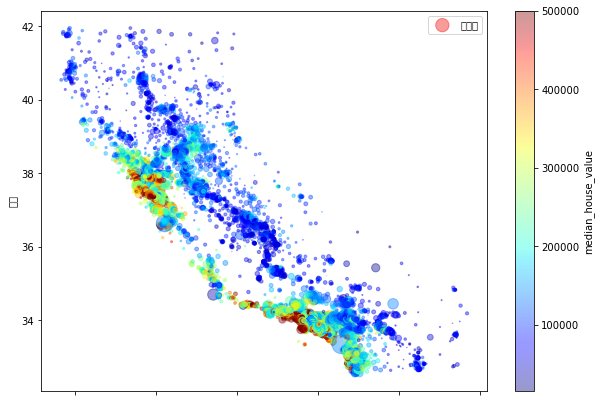

In [15]:
housing_data.plot(kind = "scatter", x = "longitude",xlabel = "经度", y = "latitude", ylabel = "纬度", alpha = 0.4,
                 s = housing_data["population"] / 100, label = "人口数", figsize = (10, 7),
                 c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True)
plt.legend()

我们已经走到这一步了，但是还可以让这张图片表现得更加美观一些\
我们给图表添加一个背景图片，这样就有了一种在地图上真实显示的感觉\
老样子，首先我们写一个自动下载的程序\
(为什么不用上面写好的，你是不是忘了？)\
啊，并不是这样子，是因为上面的那个还涉及解压缩，这边没办法执行这一步

In [19]:
images_path = os.path.join("ch2", "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

URLError: <urlopen error [Errno 101] Network is unreachable>

In [16]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing_data.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing_data['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing_data["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

NameError: name 'images_path' is not defined

现在我们来计算每对属性之间的相关系数\
给出函数：
```python
# 计算出任意两者间的相关系数
corr_matrix = data.corr()
# 计算出a与其他之间的相关系数
corr_matrix = data.corr()["a"]
```
这里我们使用了pandas提供的corr函数，该函数可以计算出不同数据之间的相关系数\
相关系数的概念：
- 符号代表了正相关或负相关
- 结果的绝对值在0和1之间
- 绝对值越接近1代表线性关系越强，反之则代表几乎没有线性关系

In [17]:
corr_matrix = housing_data.corr()
# 展示median_house_value与其他的相关系数，ascending为排列顺序，代码中为降序排列
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

除此之外，pandas还提供了将相关性绘制出图的函数\
在这里由于篇幅问题所以只展示了4x4=16张图片的结果

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

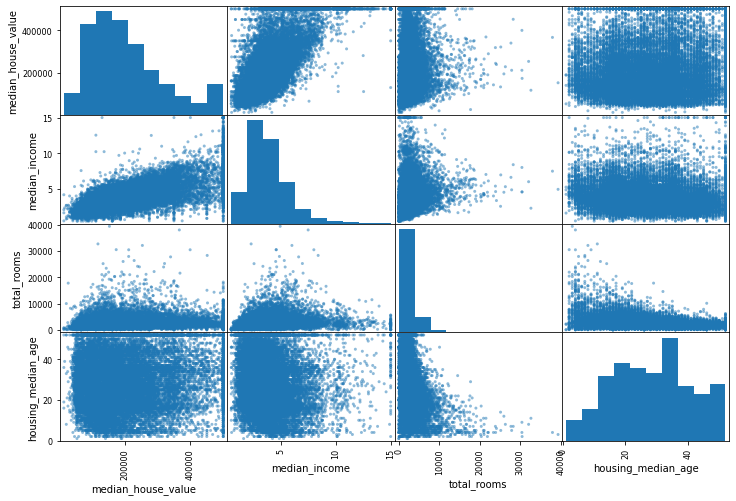

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing_data[attributes], figsize=(12, 8))

然而我想全部展示出来\
然后就得到了如下很离谱的结果

array([[<AxesSubplot:xlabel='longitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='longitude'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='longitude'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='longitude'>,
        <AxesSubplot:xlabel='population', ylabel='longitude'>,
        <AxesSubplot:xlabel='households', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_income', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='longitude'>],
       [<AxesSubplot:xlabel='longitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='latitude'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='latitude'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='latitude'>,
        <AxesSubplot:xlabel='population', ylabel='latitude'>,
        <AxesSubplot:xlabel='

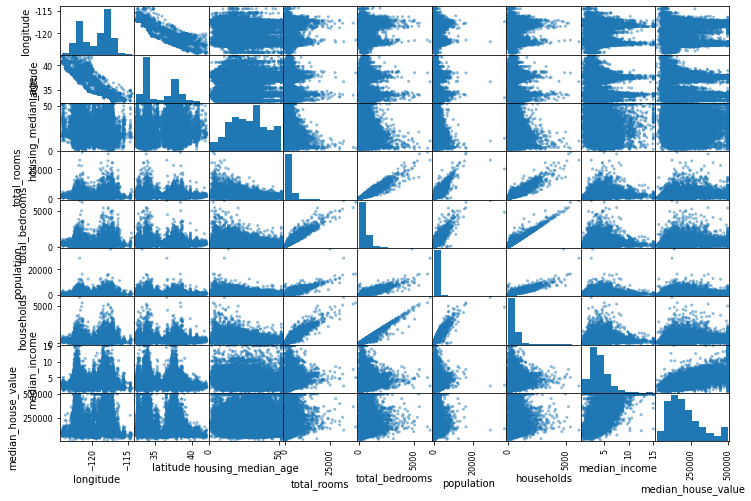

In [19]:
scatter_matrix(housing_data, figsize=(12, 8))

这里玩的有点过了，我们暂且先收回来。\
从之前的图中和再往前的数据中我们可以看得出来，收入中位数和房价中位数具有较强的线性关系\
因此，我们可以单独提取出这两者的散点图

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

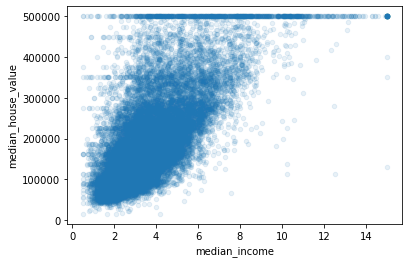

In [20]:
housing_data.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.1)

进行了前面冗长的步骤之后，我们终于来到了真正的机器学习部分\
尽管前面的步骤繁多且重复性较强，但是我们还是可以从中学习到许多数据处理的思想和方法\
在这里，我们开始处理之前生成的训练集以及测试集并最终训练出一个线性回归模型\
我们先来回忆一下之前分出的train数据集以及相应的参量

In [21]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


In [22]:
housing = strat_train_set.drop("median_house_value", axis = 1)
# 由于直接赋值相当于指针的作用，后续的操作会改变原始数据，因此使用copy来进行复制
housing_labels = strat_train_set["median_house_value"].copy()

一般在进行数据处理的时候，我们会遇到数据空缺等情况，在绝大多数的机器学习库都是无法对缺失数据进行操作的\
因此，我们需要额外进行一些操作（当然，在这个数据集内没有出现这种情况，所以就不需要操作） 
```python
# dropna 可以消除nan数据，在某些数据空缺中会出现nan现象，此时是直接消除nan所在行
data.dropna()
# drop 可以根据其括号内的参数进行一些数据的刨除
data.drop()
```

sklearn同样也提供给我们了一个处理缺失项的函数：

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")

中位数的计算只能用于纯数值，因此我们需要创建一个没有文本的数据集\
我们先来看一下原有的数据的大致样貌

In [24]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


然后我们来看看删除完成后的样子

In [25]:
housing_num = housing.drop("ocean_proximity", axis = 1)
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


现在使用fit()适配到housing_num中\
最后imputer的输出结果为每列的中位数，且储存在statistics_中

In [26]:
imputer.fit(housing_num)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

现在将缺失项替换成中位数就完成了训练集的数据处理工作

In [27]:
X = imputer.transform(housing_num)
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

我们可以看到输出的结果是一个numpy格式的数组\
我们下面开始转换成之前上面更为直观且美观的pandas结构

In [28]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


这样子，我们成功处理完了训练数据\
同时，关于imputer类的主要用法也已经大致了解了

值得注意的是，在之前的操作中，我们仅对于float类型的数据进行了处理，删去了string类型的数据\
因此，在这里我们要对ocean_proximity进行处理

In [29]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


可以注意到的是，这些文本可不是乱来的哦，他是有备而来，有规律可循的\
这样一来，我们就可以偷鸡，将这些转化成为数字格式以便与处理

In [30]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

这里我们就可以看到前十行的字符所映射出的数字\
并且，我们在categories可以看出不同数字所指代的类型名称

In [31]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

这样表示对于人来说固然直观，但是机器可能会根据两个数字的差的绝对值来判断相关性，因此这样处理的效果并不是很好\
书中所推荐的表示方法是使用所谓的“热向量”进行表示：
- 某一个类型以一个位为1，其他为0来表示
- 以这个数据集为例，一个类型可以由一个五维向量表示
- [1, 0， 0， 0, 0]这样来进行表示

In [32]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [33]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [34]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## 自定义转换器

这里我用了二级标题，为什么呢？因为很难，我看不懂orz。\
然后这里直接截取了github上的代码进行参考。

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

后需要进行的处理叫做特征缩放\
有一说一，可能这个名字对于我们来说不是很常见？至少对于我自己是这个样子的\
但是在这里我们常用两种方法，我相信你一定听过：\
**归一化** 和 **标准化**
- 归一化：用当前值减去最小值的差比上最大值和最小值的差，使得所有的结果都在0~1的区间范围内
- 标准化：$ \frac{X_i-\mu}{\sigma}$，其中$\mu$为平均数，$\sigma$为标准差

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy = "median")), 
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler())])
housing_num_tr = num_pipeline.fit_transform(housing_num)

Pipeline构造的函数会通过一系列名称/估算器的配对来定义步骤序列。因为存在转换器（前两个），所以必须使用fit_transform()，前面的字符串命名可以up to you，但是必须确保其唯一性。

sklearn为了用户更加简便的处理数据，引入了Column-Transformer函数，并且与pandas DataFrame一起使用时会更好\
——出自书中的内容，实际上我也不是非常明白

In [37]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),
                                   ("cat", OneHotEncoder(), cat_attribs)])
housing_prepared = full_pipeline.fit_transform(housing)

跟前面的Pipeline相似的功能，这里不过多赘述了。\
但是我还是想插一句，既然有这么方便的方法，我们还在前面如此艰难的负重前行，现在觉得自己当初就跟个傻逼似的！

## 我们终于开始模型训练啦
我们已经解决了《初识机器学习sklearn》这一部分的全部数据处理内容了\
不得不说真的把人累成狗了，虽然说是copy已有的代码并且添加自己的理解\
但是照着敲上去也不是一件容易的事情

首先我们可以使用sklearn提供的功能包建立一个线性回归的模型：

In [38]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

在这里有没有一种可能，已经有人记不清`housing_labels`到底是什么了\
其实我也是记不得了，所以我们再来把这两个都回忆一下吧

In [39]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [40]:
housing_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [41]:
housing.iloc[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [42]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


其实差异还是蛮大的，所以我们来使用RMSE来计算一下

In [43]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68628.19819848923


由于大部分的median_housing_values处于120,000~265,000之间，因此这个结果就是一坨*\
这是由于模型欠拟合导致的，而为了解决欠拟合的问题，我们需要提供更合适的信息，或者选择更加强大的模型\
很显然，我同时不具备这两者的能力，所以GO FUCKING YOUSELF.

In [44]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [45]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

一件非常扯淡的事情：rmse居然可以等于0，相当于预测结果和实际结果无差！！！\
很显然，这个是十分不科学的，原因就在于过拟合了！\
模型在这种情况下总是更希望使用训练时的数据当做结果输出出来\
这显然不能满足我们的要求，我们所需求的是在面临一个新的数据及的时候也可以做出相对准确的预测。

一个相对常用的检测模型的方法便是使用测试集来检测结果的可靠性\
书中给出了另外一种名叫**交叉验证**的方法\
这种验证方法的思路就是将一个数据集分成n份，进行n次训练，n-1个作为训练集，1个作为测试集来交叉检验模型\
sklearn提供了一个交叉验证的函数`cross_val_score`

In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)

这里定义了一个函数，来显示分数中的更多的的细节

In [47]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

所以到这里有没有一种可能，我们可以运行这个函数了

In [48]:
display_scores(tree_rmse_scores)

Scores: [68157.60544017 67859.53517797 72417.86762826 69113.86383261
 71873.21396354 75025.6101773  70923.62435737 70508.01410293
 75824.03323506 71216.9554204 ]
Mean: 71292.0323335618
Standard deviation: 2513.7829091159933


有人可能会发现，为什么我的结果和书上的不一样，甚至相差很大呢？\
这里表明了每次机器学习结果都有着随机性，因此几乎不可能出现一模一样的情况。\
举个例子：在考虑彻底遗忘的情况下，同一张卷子你两次学习考出来的成绩也是不一样的。

同样，我们来计算一下线性回归模型的Scores，进行对比参考

In [49]:
linear_scores = cross_val_score(tree_reg,housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
linear_rmse_scores = np.sqrt(-linear_scores)
display_scores(linear_rmse_scores)

Scores: [69108.12565124 65511.0939271  69071.58345323 68487.09946768
 72325.10243477 76317.72497294 71816.95578273 70346.59173713
 76716.49755046 68817.49259734]
Mean: 70851.826757462
Standard deviation: 3348.004212367357


Lower is Better\
所以上述的情况其实跟欠拟合的线性回归方法半斤八两

现在我们可以再尝试一下**随机森林**模型是否合适

In [50]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [51]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
print("Forest RMSE:", np.sqrt(forest_mse))
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Forest RMSE: 18697.172735484553
Scores: [49419.15943553 47383.87216655 50250.17017202 52433.71980423
 49257.40782116 53693.58683764 48675.32551184 47997.54212878
 52891.61894531 49977.32393056]
Mean: 50197.97267536126
Standard deviation: 2027.2086036416417


u1s1，随机森林计算的速度还是远小于前面两个的，但是结果确实好了挺多的，但是仍然过拟合

中间有个小插曲哈，是教我们如何保存模型的\
使用Python提供给我们的`joblib`库\
但是今天我在的地方网断了，并且我目前并没有安装这个库，就先不搞了

在确定随机森林模型为这三者之间最优的模型后，我们现在需要的就是给模型确定一个最优的参数，以保证能够满足我们的需求\
目前提供了两种方法：**网格搜索**和**随机搜索**
- 网格搜索：适用于微调，在指定的几个参数中挑选出最佳的超参数
- 随机搜索：一个大范围搜索的方式，并不会枚举出每个超参数并进行计算，而是在合理的范围内生成随机数进行判断验证

首先我们先使用网络搜索的方式在给定的范围内进行搜索

In [53]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [54]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

这样就得到了本次评估中最好的超参数\
同时，我们也可以直接获取最好的估算器：

In [55]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

同样的，我们可以打印出所有训练情况的分数：

In [56]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64017.1984876224 {'max_features': 2, 'n_estimators': 3}
55990.51730497341 {'max_features': 2, 'n_estimators': 10}
52763.2758401708 {'max_features': 2, 'n_estimators': 30}
60052.14549935556 {'max_features': 4, 'n_estimators': 3}
52953.37375122264 {'max_features': 4, 'n_estimators': 10}
50352.34903447693 {'max_features': 4, 'n_estimators': 30}
58763.16839508376 {'max_features': 6, 'n_estimators': 3}
52645.261326533015 {'max_features': 6, 'n_estimators': 10}
50025.358826817974 {'max_features': 6, 'n_estimators': 30}
59153.27401300069 {'max_features': 8, 'n_estimators': 3}
51835.63163736527 {'max_features': 8, 'n_estimators': 10}
50229.2660494093 {'max_features': 8, 'n_estimators': 30}
62788.40862266025 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54804.53498889984 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59610.796714118216 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53032.40249869944 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

至于随机搜索，书上并没有给我们提供详细的代码作为参考，咱也不会，所以就先不写了

在上述生成的最佳模型当中，我们可以让其罗列出不同类型的数据的重要程度：

In [59]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.66084162e-02, 7.33534011e-02, 4.05739930e-02, 1.87392719e-02,
       1.75420561e-02, 1.76534798e-02, 1.60639989e-02, 3.21405408e-01,
       6.26051735e-02, 1.08918305e-01, 7.12061179e-02, 7.12684632e-03,
       1.60879375e-01, 1.34860114e-04, 2.50723470e-03, 4.68206179e-03])

这样看起来不是很好看，我们可以在每项数据旁边加上对应类型的名称，便于我们筛选

In [61]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attibutes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.07660841617343189, 'median_house_value'),
 (0.07335340109248413, 'median_income'),
 (0.04057399304392507, 'total_rooms'),
 (0.018739271931445495, 'housing_median_age')]

很好，上面的情况就是我们日常编程可能会遇到的出现了Bug\
反正我是摆烂了，后续可能会尝试debug

我们现在回到检验评估系统的方法，先前使用了交叉验证的方式来确定模型类型的好坏\
现在我们要尝试使用测试集来进行模型的评估

In [63]:
final_model = grid_search.best_estimator_
# X_test就相当于自变量，进行带入求解房子价值中位数的，因此需要先把结果删去
X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [64]:
print("Final Model RMSE:", final_rmse)

Final Model RMSE: 47459.1686377987


这样，我们得到了最终训练模型的测试集成绩\
但是由于成绩存在波动，因此我们需要设计一个置信区间，通常为95%

In [65]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc = squared_errors.mean(),
                         scale = stats.sem(squared_errors)))

array([45527.39904677, 49315.32532203])

自此，我们完成了第二章的所有代码部分，完结撒花！